In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
import os
from PIL import Image
import matplotlib.pyplot as plt

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [14]:
%cd /content/gdrive/MyDrive

/content/gdrive/MyDrive


In [16]:
data_dir = 'ALL'

In [17]:
# Update the class_to_label dictionary based on the actual directories found.
# The previous output showed 'all_pro', 'all_pre', 'all_benign', 'all_early'
class_to_label = {'all_benign': 0, 'all_early': 1, 'all_pre': 2, 'all_pro': 3}


class ALLDatasetSplit(Dataset):
    def __init__(self, image_files, labels, transform=None):
        self.image_files = image_files
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = self.image_files[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

all_image_files = []
all_labels = []

# Iterate through each folder in ALL
for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        if class_name in class_to_label: # Only process directories that are in the class_to_label map
            # Assign image_file to all_image_files and class labels all_labels
            for image_file in os.listdir(class_dir):
                all_image_files.append(os.path.join(class_dir, image_file))
                all_labels.append(class_to_label[class_name])
        else:
            print(f"Warning: Directory '{class_name}' not found in class_to_label and will be skipped.")



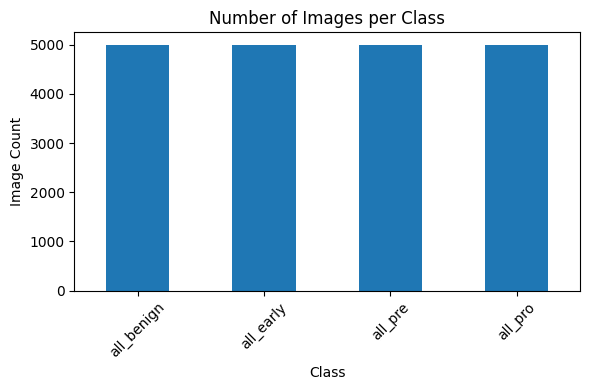

In [25]:
class_counts = {}

for class_name in class_to_label:
    class_dir = os.path.join(data_dir, class_name)
    images = [f for f in os.listdir(class_dir) if f.lower().endswith(('.jpg','.jpeg','.png'))]
    class_counts[class_name] = len(images)

pd.DataFrame.from_dict(class_counts, orient='index', columns=["Count"])

# Convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(class_counts, orient='index', columns=["Count"])

# Plot
plt.figure(figsize=(6,4))
df["Count"].plot(kind='bar')

plt.title("Number of Images per Class")
plt.xlabel("Class")
plt.ylabel("Image Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

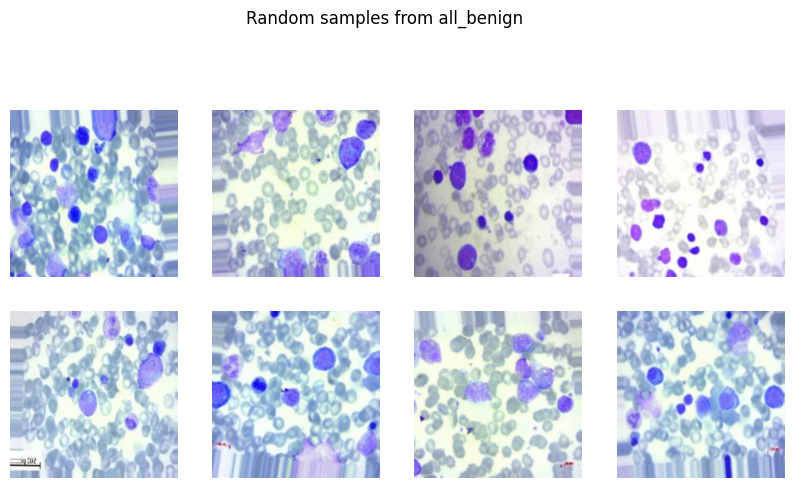

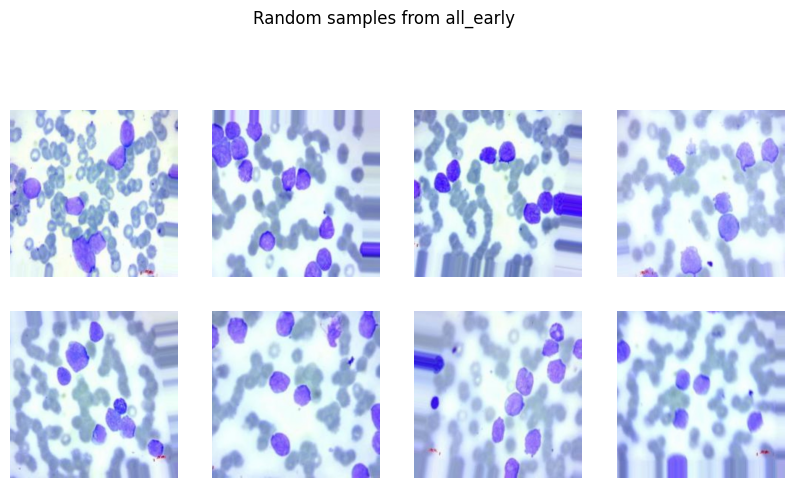

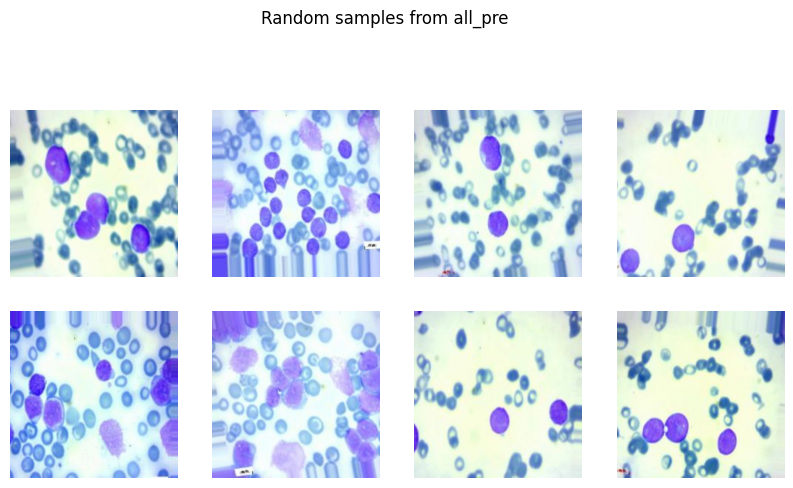

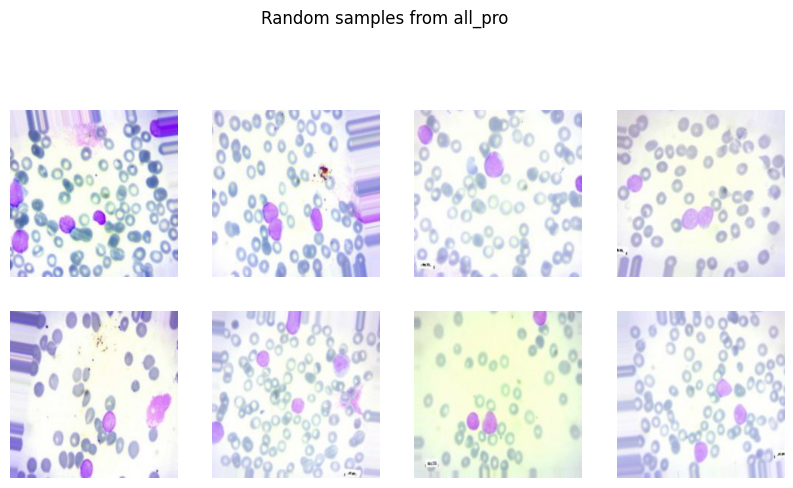

In [22]:
import random

def show_samples(class_name, n=8):
    folder = os.path.join(data_dir, class_name)
    files = [os.path.join(folder,f) for f in os.listdir(folder) if f.lower().endswith(('.jpg','.png','.jpeg'))]

    sample = random.sample(files, min(n, len(files)))

    plt.figure(figsize=(10,10))
    for i, f in enumerate(sample):
        img = Image.open(f)
        plt.subplot(4,4,i+1)
        plt.imshow(img)
        plt.axis("off")
    plt.suptitle(f"Random samples from {class_name}")
    plt.show()

for c in class_to_label.keys():
    show_samples(c)
